In [140]:
import pandas_datareader
df = pandas_datareader.DataReader('BABA', data_source='yahoo', start='2014-10-01')
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-10-01,88.699997,88.940002,86.040001,86.099998,24029600,86.099998
2014-10-02,86.269997,88.199997,85.611000,87.059998,21469700,87.059998
2014-10-03,88.099998,89.940002,87.650002,88.099998,18485700,88.099998
2014-10-06,89.150002,89.650002,88.059998,88.309998,9268400,88.309998
2014-10-07,87.949997,89.699997,87.059998,87.669998,12791700,87.669998


In [141]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [143]:
?df.plot

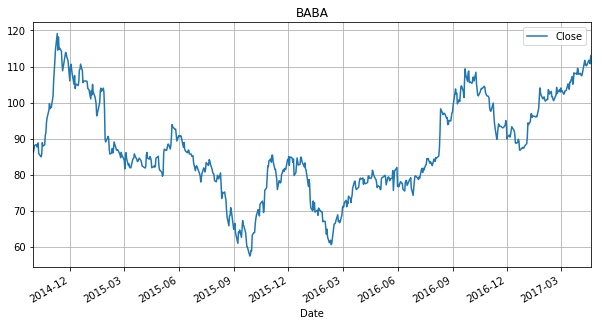

In [149]:
df['Close'].plot(kind='line', figsize=[10,5], legend=True, title='BABA', grid=True)

In [152]:
#df['mvg30']
df['mvg30']  = df['Close'].rolling(window=30).mean()

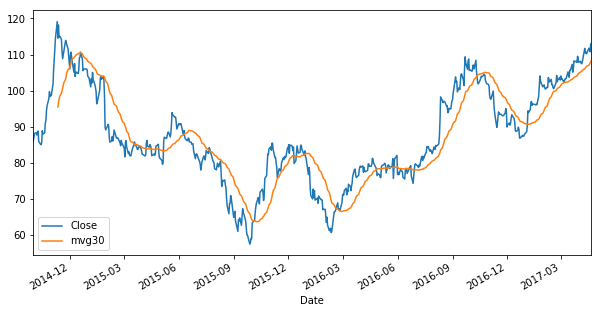

In [155]:
df[['Close', 'mvg30']].plot(kind = 'line', figsize=[10,5])

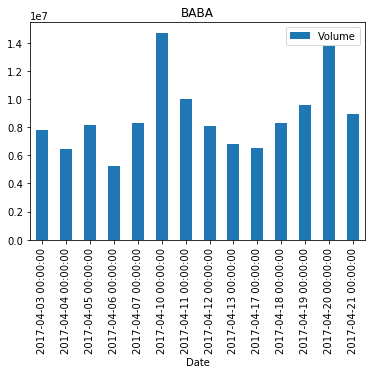

In [161]:
df.ix[df.index >= '2017-04-01'   ,  'Volume'].plot(kind='bar', legend=True, title='BABA')

In [164]:
df['diff'] =  df['Close'] - df['Open']
df['rise'] = df['diff'] > 0 
df['fall'] = df['diff'] < 0 

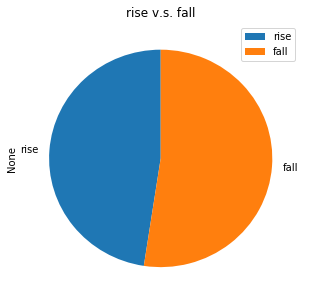

In [172]:
df[['rise', 'fall']].sum().plot(kind='pie', figsize=[5,5], counterclock=True, startangle = 90, legend=True, title='rise v.s. fall')

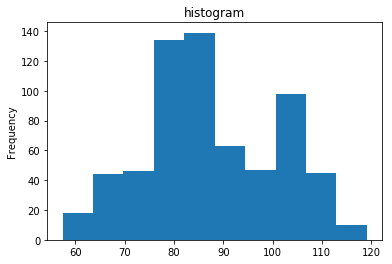

In [175]:
df['Close'].plot(kind='hist', title='histogram')

In [176]:
df['ret'] = df['Close'].pct_change(1)

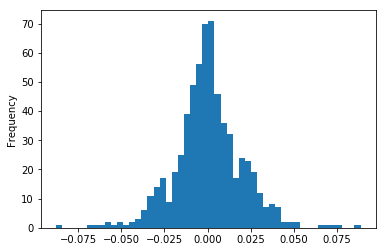

In [178]:
df['ret'].plot(kind = 'hist', bins = 50)

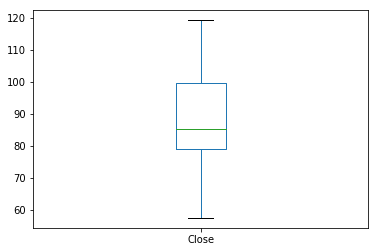

In [179]:
df['Close'].plot(kind='box')

In [180]:
import pandas_datareader
df = pandas_datareader.DataReader(['BABA', 'BIDU'], data_source='yahoo', start='2014-10-01')['Close']
df.head()

,BABA,BIDU
Date,,
2014-10-01,86.099998,212.029999
2014-10-02,87.059998,214.800003
2014-10-03,88.099998,216.449997
2014-10-06,88.309998,217.199997
2014-10-07,87.669998,215.630005


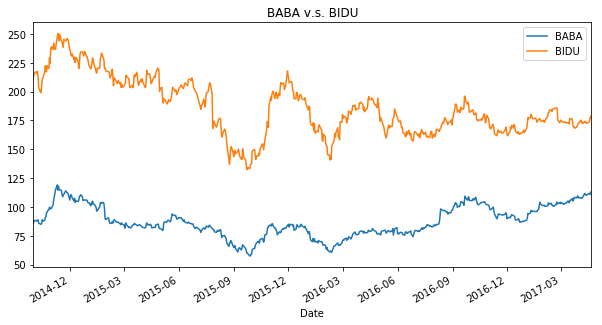

In [183]:
df.plot(kind='line', figsize=[10,5], title="BABA v.s. BIDU")

In [184]:
rets = df.pct_change(1)

In [185]:
rets.head()

,BABA,BIDU
Date,,
2014-10-01,NaN,NaN
2014-10-02,0.011150,0.013064
2014-10-03,0.011946,0.007682
2014-10-06,0.002384,0.003465
2014-10-07,-0.007247,-0.007228


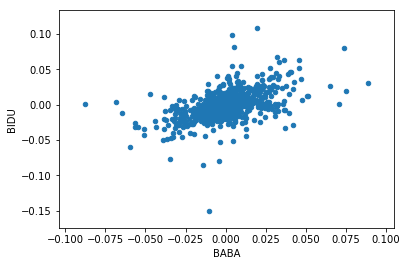

In [186]:
rets.plot(kind='scatter', x='BABA', y='BIDU' )

In [190]:
corr = rets.corr()
corr

,BABA,BIDU
BABA,1.000000,0.506644
BIDU,0.506644,1.000000


([<matplotlib.axis.YTick at 0x1c55edd8>,
 <a list of 2 Text yticklabel objects>)

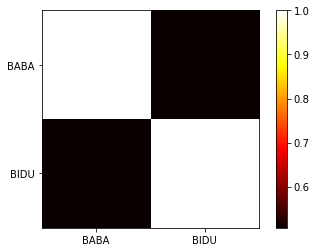

In [194]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)